In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [116]:
import ast
def open_data(path,format_file):
    if format_file=='text_dict':
        file = open(path+".txt", "r")
        contents = file.read()
        #display(contents)
        dictionary = ast.literal_eval(contents)
        return dictionary
#dict_ece_cohen = open_data('metrics/kappa_and_ece','text_dict')
dict_ece_cohen = open_data('metrics/tmp_dct_rf_gbdt_full2','text_dict')

In [117]:
def mod_dict(res_dict, type_to_compare):
    tot_dict = {}
    for model_name in res_dict.keys():
        modified_subdict = {}
        for dataset in res_dict[model_name].keys():
            data_set_dict = res_dict[model_name][dataset]
            data_set_dict = {key:val for key,val in data_set_dict.items() if isinstance(val,type_to_compare)}
            modified_subdict[dataset] = data_set_dict        
        tot_dict[model_name] = modified_subdict
    return tot_dict

In [118]:
new_dict = {}
for key_met in dict_ece_cohen.keys():
    new_dict[key_met] = mod_dict(dict_ece_cohen[key_met],tuple)


In [119]:
cohens_results = new_dict['cohen_kappa']
ece_results = new_dict['ece']


In [120]:
def plot_times_fill(df,color, ax= None,label = None, title=None, xlabel = 'Data Size',ylabel=None): 
    list_vals = []; data_size_list = [] 
    df = df.astype(float)
    for col in df.columns:
        list_vals.extend(df[col].to_list()); data_size_list.extend([col]*len(df[col]))
        #display(list_vals)
        #display(data_size_list)
    ax.scatter(data_size_list,list_vals,marker = '.',color= color)
    ax.fill_between(df.columns, df.min(),df.max(),alpha=0.2,color=color)
    df.mean().plot(color= color, ax=ax, label = label)
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel)
    ax.set_title(title)

In [143]:
def plot_std(df,color, ax= None,label = None, title=None, xlabel = 'Data Size',ylabel=None): 
    list_vals = []; data_size_list = [] 
    df = df.astype(float)
    for col in df.columns:
        list_vals.extend(df[col].to_list()); data_size_list.extend([col]*len(df[col]))
    df.std().to_frame().plot(color= color, ax=ax, label = label)
    ax.legend('upper right')
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel)
    ax.set_title(title)

,10,22,49,108,238,1158
0,0.200160,0.411197,0.823122,0.868028,0.877035,0.978074
1,0.359217,0.125553,0.817624,0.849626,0.890118,0.981176
2,0.581990,0.725850,0.831022,0.839116,0.872132,0.968636
3,0.200728,0.804377,0.773150,0.829559,0.915258,0.984312
4,0.006068,0.521227,0.840040,0.849377,0.924808,0.978049


,0
10,0.214845
22,0.269557
49,0.025924
108,0.014327
238,0.023263
1158,0.005865


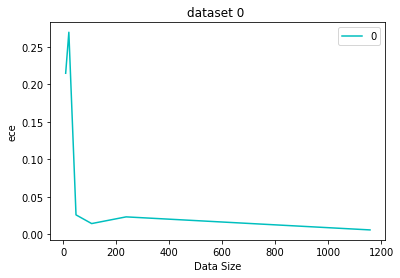

In [131]:
fig,ax = plt.subplots()
plot_std(df_vals,available_colors[model_num][0],ax,model_name, 'dataset %s '%dataset_num, ylabel ='ece')
       

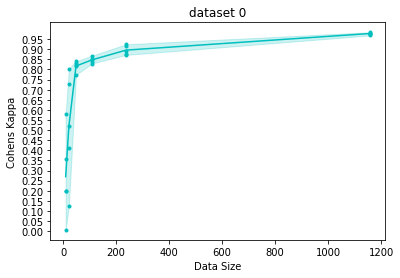

In [123]:
fig,ax = plt.subplots()
plot_times_fill(df_vals.astype(float),available_colors[model_num][0],ax,model_name, 'dataset %s'%dataset_num, ylabel ='Cohens Kappa')
ax.set_yticks(np.arange(0, 1, 0.05), minor=False);

In [151]:
list(cohens_results.keys())

['GBDT', 'RF', 'DN']

C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: Dropping of nuisance columns in DataFrame r

C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Dropping of nuisance columns in DataFrame r

C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: Dropping of nuisance columns in DataFrame r

C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Dropping of nuisance columns in DataFrame r

C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame r

C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Dropping of nuisance columns in DataFrame r

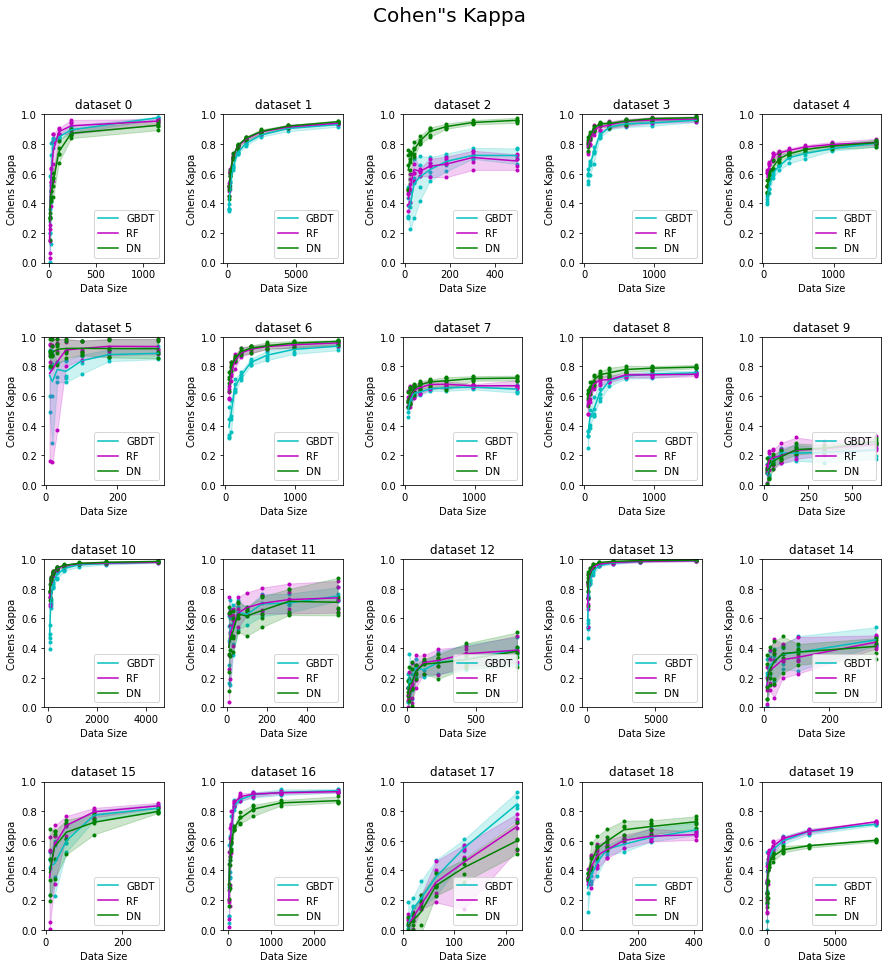

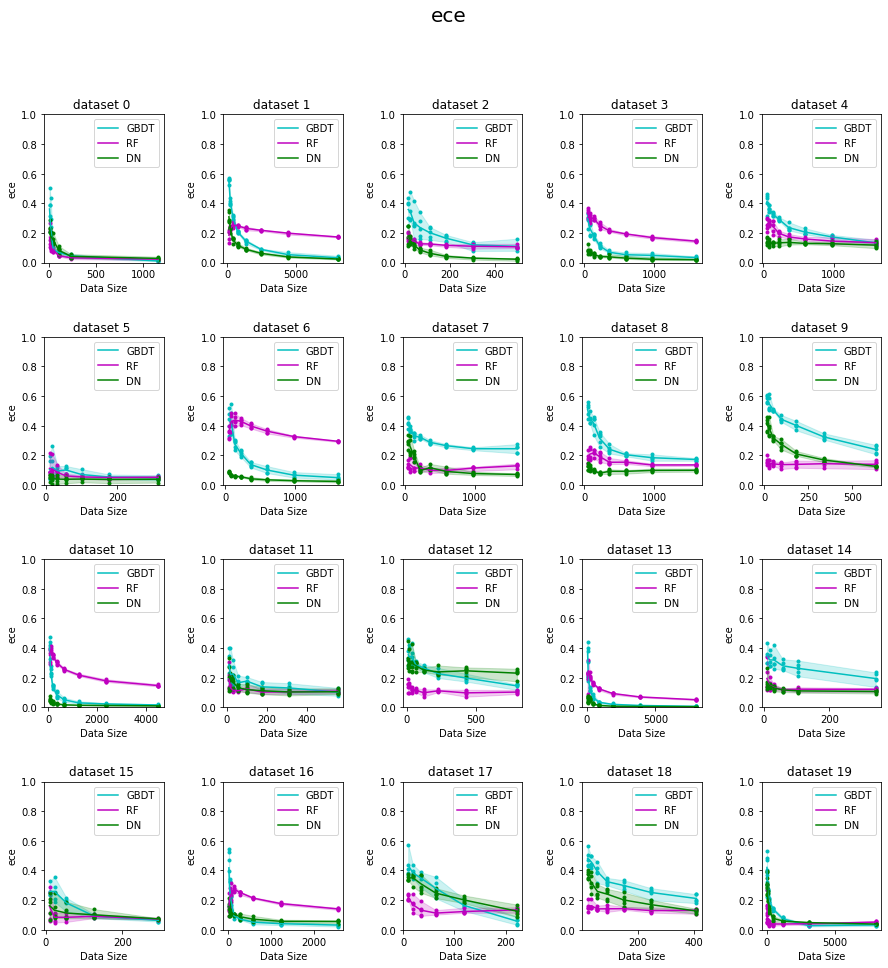

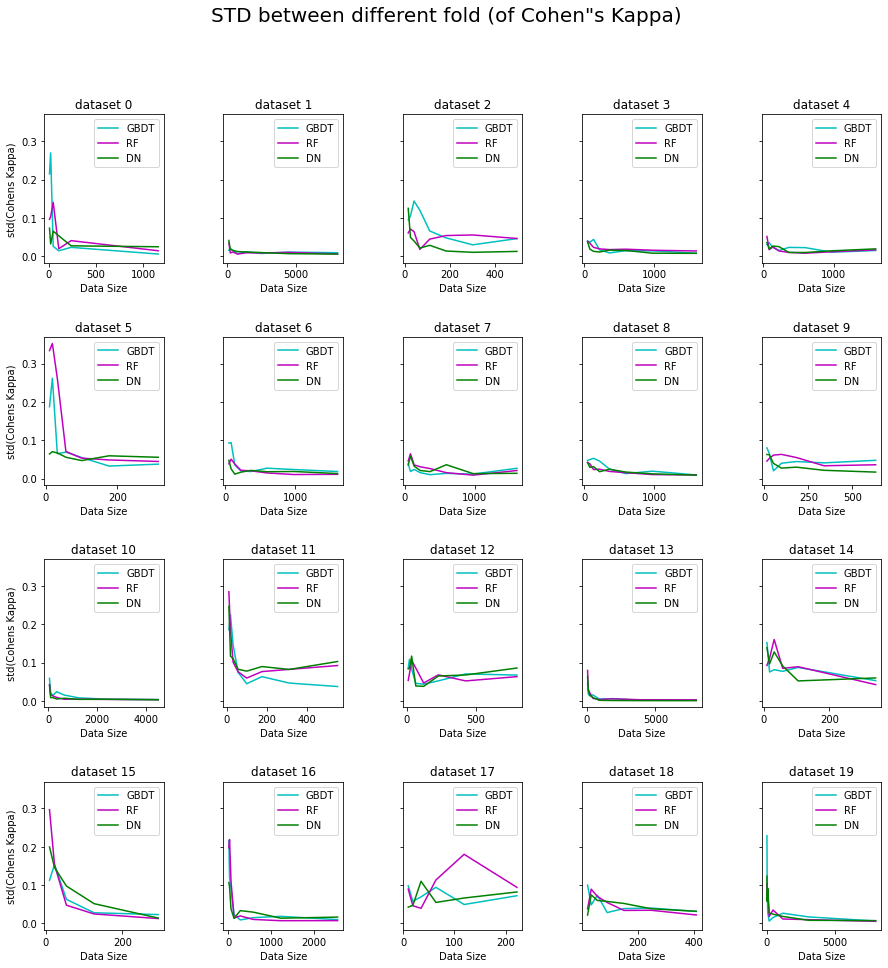

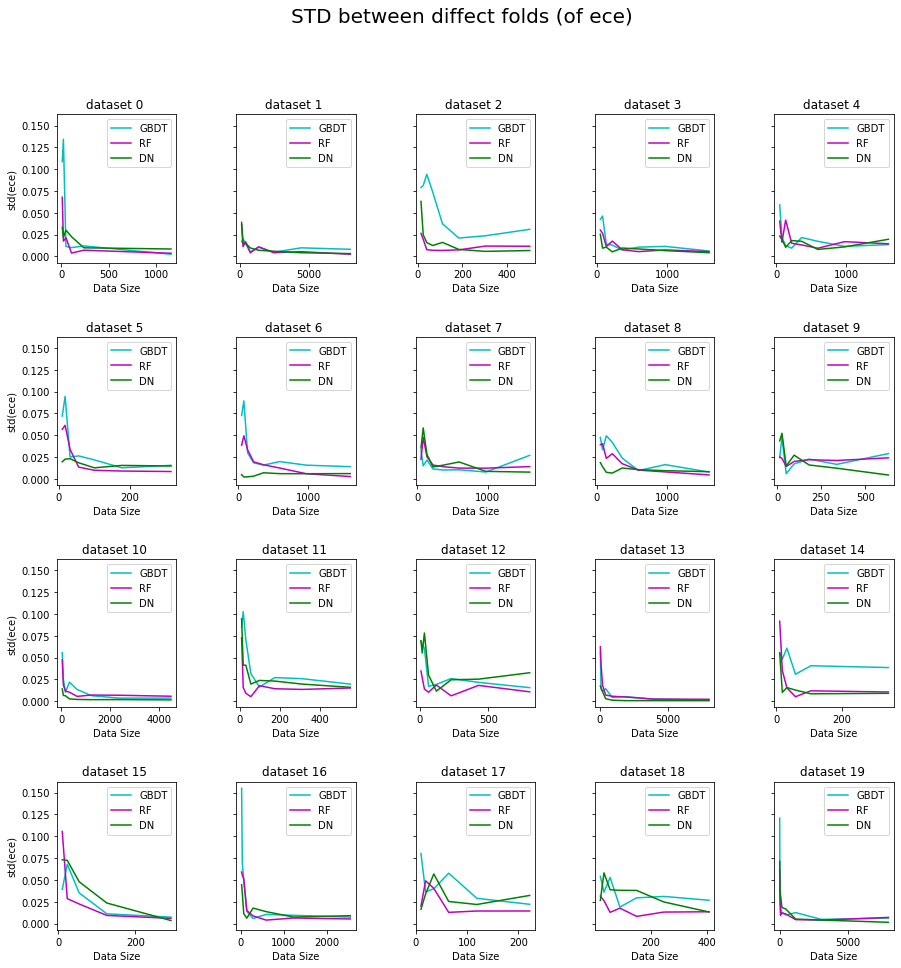

In [154]:
fig_cohen, axs_c = plt.subplots(4,5, figsize= (15,15))
fig_ece, axs_e = plt.subplots(4,5, figsize= (15,15))
fig_cohen_std, axs_c_std = plt.subplots(4,5, figsize= (15,15),sharey= True)
fig_ece_std, axs_e_std = plt.subplots(4,5, figsize= (15,15),sharey = True)

available_colors = np.array(['c','blue','m','purple','green','lightgreen','crimson','red']).reshape(-1,2)
means_dfs = {'ece':{},'cohen_kappa':{}}
if not isinstance(axs_c,np.ndarray):
    axs_c=[axs_c]
if not isinstance(axs_c_std,np.ndarray):
    axs_c_std=[axs_c_std]
if not isinstance(axs_e,np.ndarray):
    axs_e=[axs_e]
if not isinstance(axs_e_std,np.ndarray):
    axs_e_std=[axs_e_std]
axs_ef = axs_e.flatten(); axs_cf = axs_c.flatten(); axs_cf_std = axs_c_std.flatten(); axs_ef_std = axs_e_std.flatten()
for model_num, model_name in enumerate(cohens_results.keys()):
    means_dfs['ece'][model_name] = pd.DataFrame()
    means_dfs['cohen_kappa'][model_name] = pd.DataFrame()
    cur_colors = available_colors[model_num]
    for dataset_num in cohens_results[model_name].keys():
        
        df_vals = pd.DataFrame(ece_results[model_name][dataset_num])    
        df_vals_mean = df_vals.mean().to_frame().T; df_vals_mean.columns = np.arange(df_vals_mean.shape[1]); df_vals_mean.index = [dataset_num]
        means_dfs['ece'][model_name] = pd.concat([means_dfs['ece'][model_name],df_vals_mean])
        
        axs_ef[dataset_num].set_ylim([0,1])
        axs_cf[dataset_num].set_ylim([0,1])        
        plot_times_fill(df_vals,available_colors[model_num][0],axs_ef[dataset_num],model_name, 'dataset %s '%dataset_num, ylabel ='ece')
        
        df_vals = pd.DataFrame(cohens_results[model_name][dataset_num])
        df_vals_mean = df_vals.mean().to_frame().T; df_vals_mean.columns = np.arange(df_vals_mean.shape[1]); df_vals_mean.index = [dataset_num]
        means_dfs['cohen_kappa'][model_name] = pd.concat([means_dfs['cohen_kappa'][model_name],df_vals_mean])
        plot_times_fill(df_vals,available_colors[model_num][0],axs_cf[dataset_num],model_name, 'dataset %s'%dataset_num, ylabel ='Cohens Kappa')
        
        ###
        df_vals = pd.DataFrame(cohens_results[model_name][dataset_num])
        df_vals_std = df_vals.std().to_frame().T; df_vals_std.columns = np.arange(df_vals_std.shape[1]); df_vals_std.index = [dataset_num]
        means_dfs['cohen_kappa'][model_name] = pd.concat([means_dfs['cohen_kappa'][model_name],df_vals_std])
        plot_std(df_vals,available_colors[model_num][0],axs_cf_std[dataset_num],label = model_name, title = 'dataset %s'%dataset_num, ylabel ='std(Cohens Kappa)')

        df_vals = pd.DataFrame(ece_results[model_name][dataset_num])    
        df_vals_std = df_vals.mean().to_frame().T; df_vals_mean.columns = np.arange(df_vals_mean.shape[1]); df_vals_mean.index = [dataset_num]
        means_dfs['ece'][model_name] = pd.concat([means_dfs['ece'][model_name],df_vals_mean])

        plot_std(df_vals,available_colors[model_num][0],axs_ef_std[dataset_num],label = model_name, title = 'dataset %s '%dataset_num, ylabel ='std(ece)')
        
        axs_cf[dataset_num].legend(loc = 'lower right')
        axs_cf_std[dataset_num].legend(list(cohens_results.keys()), loc = 'upper right')
        axs_ef[dataset_num].legend(loc = 'upper right')
        axs_ef_std[dataset_num].legend(list(cohens_results.keys()),loc = 'upper right')
        
        
fig_cohen.suptitle('Cohen"s Kappa',fontsize= 20)        
fig_ece.suptitle('ece',fontsize = 20)
fig_cohen_std.suptitle('STD between different fold (of Cohen"s Kappa) ',fontsize= 20)        
fig_ece_std.suptitle('STD between diffect folds (of ece)',fontsize = 20)
spacing = 0.5
fig_cohen.subplots_adjust(hspace= spacing,wspace= spacing)
fig_ece.subplots_adjust(hspace= spacing,wspace= spacing)
fig_cohen_std.subplots_adjust(hspace= spacing,wspace= spacing)
fig_ece_std.subplots_adjust(hspace= spacing,wspace= spacing)

Text(0.5, 0.98, 'Counts "winning" model (cohens kappa) \n')

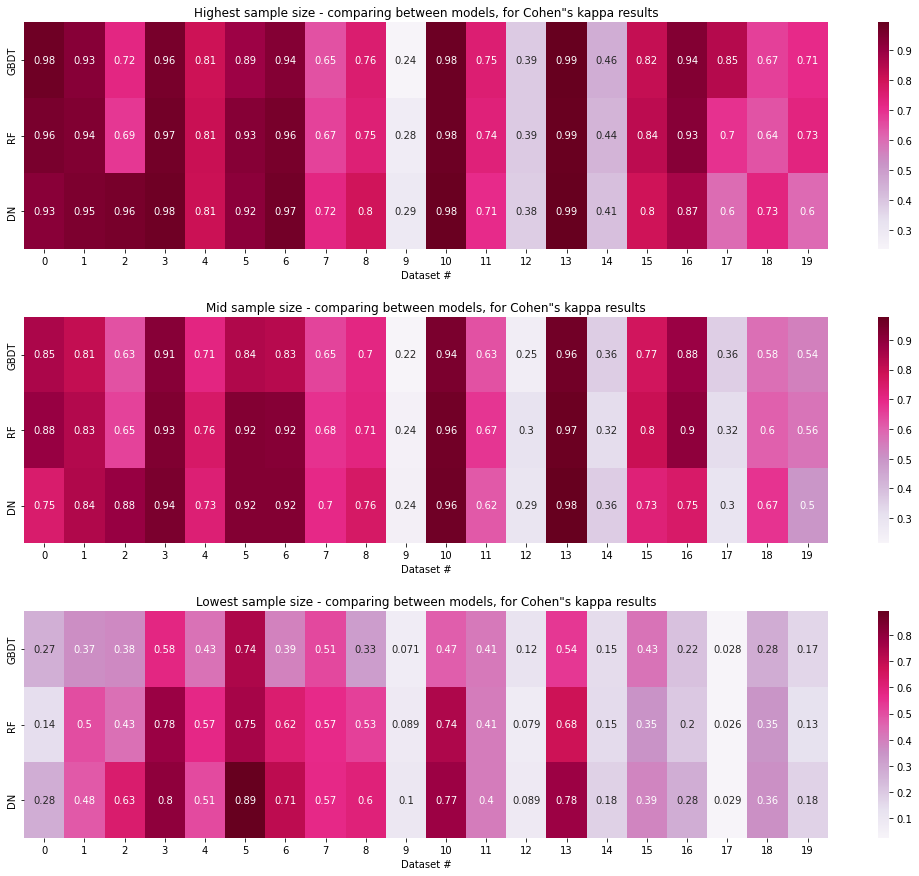

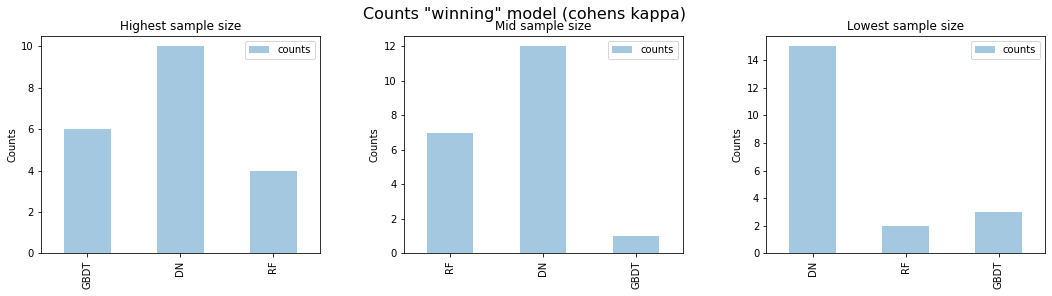

In [220]:
type_to_tale = 'highest'
new_dict_mean_highest = {};new_dict_mean_mid = {};new_dict_mean_lowest = {}
for model_name,model_vals in cohens_results.items():
    new_dict_mean_highest[model_name] = {}
    new_dict_mean_mid[model_name] = {}
    new_dict_mean_lowest[model_name] = {}
    for dataset_num,dataset_vals in model_vals.items():
        highest_key = max(dataset_vals.keys())
        highest_val_for_key = np.mean(np.array(dataset_vals[highest_key],dtype=float))
        new_dict_mean_highest[model_name][dataset_num] = highest_val_for_key
        
        sorted_keys = sorted(dataset_vals.keys())
        len_mid = int(np.ceil(len(dataset_vals.keys())/2))
        list_vals_dataset = list(dataset_vals.keys())
        mid_key = list_vals_dataset[len_mid]
        #np.median(dataset_vals.keys())
        
        mid_val_for_key = np.mean(np.array(dataset_vals[mid_key],dtype=float))
        new_dict_mean_mid[model_name][dataset_num] = mid_val_for_key
        
        lowest_key = min(dataset_vals.keys())
        lowest_val_for_key = np.mean(np.array(dataset_vals[lowest_key],dtype=float))
        new_dict_mean_lowest[model_name][dataset_num] = lowest_val_for_key        
        
        
metric = 'Cohen"s kappa'        
fig, ax = plt.subplots(3,1,figsize = (18,15))
fig2, axs = plt.subplots(1,3,figsize = (18,4))
df_highest = pd.DataFrame(new_dict_mean_highest).T
sns.heatmap(df_highest, cmap ='PuRd',annot=True, ax=ax[0]);
ax[0].set_title('Highest sample size - comparing between models, for %s results'%metric)
plot_counts_model(df_highest, axs[0], title = 'Highest sample size',type_to_check='cohen')


df_mid = pd.DataFrame(new_dict_mean_mid).T
sns.heatmap(df_mid, cmap ='PuRd',annot=True, ax=ax[1]);
ax[1].set_title('Mid sample size - comparing between models, for %s results'%metric)
plot_counts_model(df_mid, axs[1], title = 'Mid sample size',type_to_check='cohen')

df_low = pd.DataFrame(new_dict_mean_lowest).T
sns.heatmap(df_low, cmap ='PuRd',annot=True, ax=ax[2]);
ax[2].set_title('Lowest sample size - comparing between models, for %s results'%metric)
plot_counts_model(df_low, axs[2], title = 'Lowest sample size',type_to_check='cohen'  )

[ax_spec.set_xlabel('Dataset #') for ax_spec in ax]

fig.subplots_adjust(wspace = 0.3, hspace=0.3)        
fig2.subplots_adjust(wspace = 0.3, hspace=0.3)   
fig2.suptitle('Counts "winning" model (cohens kappa) \n', fontsize= 16)        
    

Text(0.5, 0.98, 'Counts "winning" model (ece) \n')

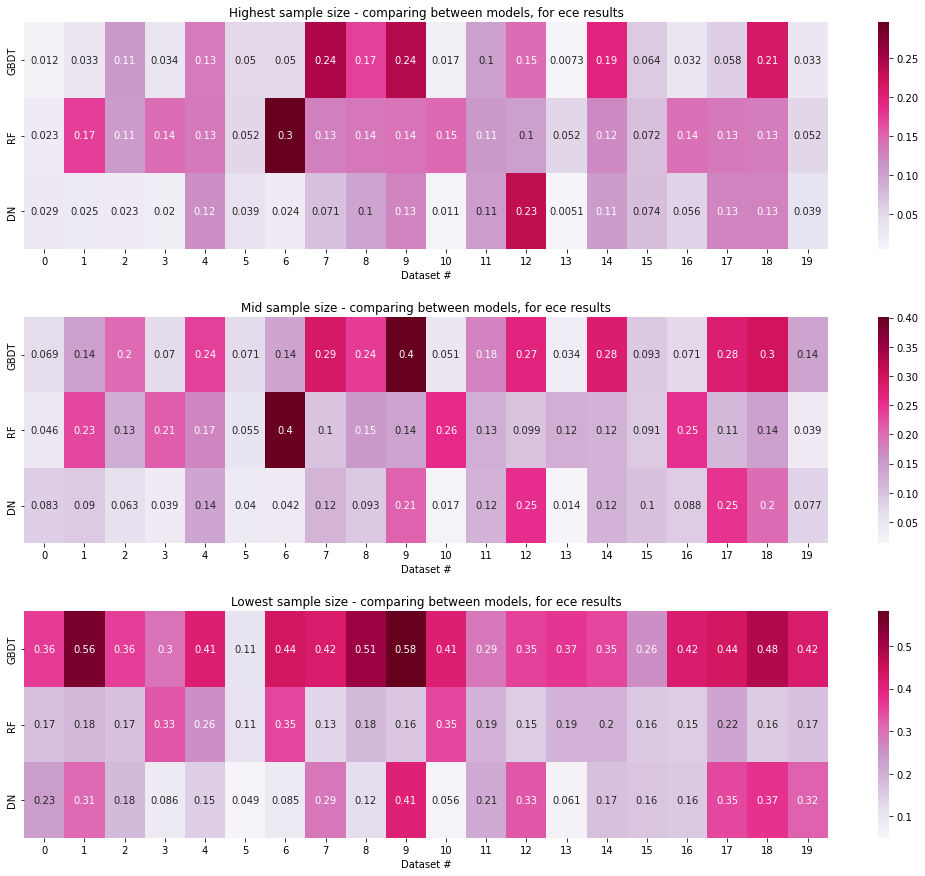

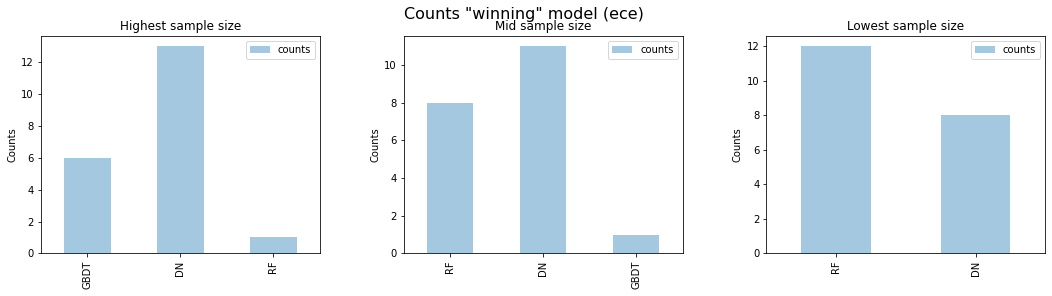

In [218]:
type_to_tale = 'highest'
new_dict_mean_highest = {};new_dict_mean_mid = {};new_dict_mean_lowest = {}
for model_name,model_vals in ece_results.items():
    new_dict_mean_highest[model_name] = {}
    new_dict_mean_mid[model_name] = {}
    new_dict_mean_lowest[model_name] = {}
    for dataset_num,dataset_vals in model_vals.items():
        highest_key = max(dataset_vals.keys())
        highest_val_for_key = np.mean(np.array(dataset_vals[highest_key],dtype=float))
        new_dict_mean_highest[model_name][dataset_num] = highest_val_for_key
        
        sorted_keys = sorted(dataset_vals.keys())
        len_mid = int(np.ceil(len(dataset_vals.keys())/2))
        list_vals_dataset = list(dataset_vals.keys())
        mid_key = list_vals_dataset[len_mid]
        #np.median(dataset_vals.keys())
        
        mid_val_for_key = np.mean(np.array(dataset_vals[mid_key],dtype=float))
        new_dict_mean_mid[model_name][dataset_num] = mid_val_for_key
        
        lowest_key = min(dataset_vals.keys())
        lowest_val_for_key = np.mean(np.array(dataset_vals[lowest_key],dtype=float))
        new_dict_mean_lowest[model_name][dataset_num] = lowest_val_for_key        
        
metric = 'ece'        
fig, ax = plt.subplots(3,1,figsize = (18,15))
fig2, axs = plt.subplots(1,3,figsize = (18,4))
df_highest = pd.DataFrame(new_dict_mean_highest).T
sns.heatmap(df_highest, cmap ='PuRd',annot=True, ax=ax[0]);
ax[0].set_title('Highest sample size - comparing between models, for %s results'%metric)
plot_counts_model(df_highest, axs[0], title = 'Highest sample size',type_to_check= 'ece')


df_mid = pd.DataFrame(new_dict_mean_mid).T
sns.heatmap(df_mid, cmap ='PuRd',annot=True, ax=ax[1]);
ax[1].set_title('Mid sample size - comparing between models, for %s results'%metric)
plot_counts_model(df_mid, axs[1], title = 'Mid sample size',type_to_check= 'ece')

df_low = pd.DataFrame(new_dict_mean_lowest).T
sns.heatmap(df_low, cmap ='PuRd',annot=True, ax=ax[2]);
ax[2].set_title('Lowest sample size - comparing between models, for %s results'%metric)
plot_counts_model(df_low, axs[2], title = 'Lowest sample size'  ,type_to_check= 'ece')

[ax_spec.set_xlabel('Dataset #') for ax_spec in ax]

fig.subplots_adjust(wspace = 0.3, hspace=0.3)        
fig2.subplots_adjust(wspace = 0.3, hspace=0.3)   
fig2.suptitle('Counts "winning" model (ece) \n', fontsize= 16)

In [195]:
dict_to_names = ['GBDT','RF','DN']
from collections import Counter

In [216]:
def plot_counts_model(df, ax, title = 'Counts "winning" model',dict_to_names = ['GBDT','RF','DN'], type_to_check = 'ece'):
    if type_to_check =='ece':
        min_error = df.to_numpy().argmin(0)
    else:
        min_error = df.to_numpy().argmax(0)
    list_winner = [dict_to_names[min_error_spec] for min_error_spec in min_error]
    df_counts = pd.DataFrame(dict(Counter(list_winner)),index= ['counts'])
    df_counts.T.plot.bar(ax = ax, alpha = 0.4)
    ax.set_title(title)
    ax.set_ylabel('Counts')
    

<AxesSubplot:>

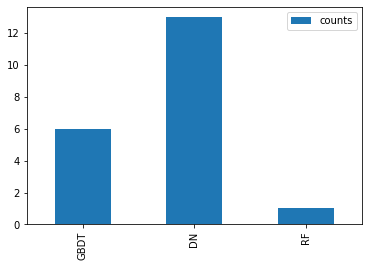

In [202]:
min_error = df_highest.to_numpy().argmin(0)
list_winner = [dict_to_names[min_error_spec] for min_error_spec in min_error]
df_counts = pd.DataFrame(dict(Counter(list_winner)),index= ['counts'])
df_counts.T.plot.bar()

In [186]:
df_low.to_numpy().argmin(0)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1],
      dtype=int64)

In [28]:
dataset_num

0

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (17,7), sharey = True)
ax = axs[0]
sns.heatmap(means_dfs['ece']['GBDT'],annot = True, ax= ax,  vmin=0, vmax=1)
ax.set_ylabel('Dataset Number')
ax.set_xlabel(' ~~ sample size');
ax.set_title('ece')
ax2 = axs[1]
sns.heatmap(means_dfs['cohen_kappa']['GBDT'],annot = True, ax= ax2,  vmin=0, vmax=1)
ax2.set_ylabel('Dataset Number')
ax2.set_xlabel(' ~~ sample size');
ax2.set_title('cohen_kappa');

cohens_results = ["cohen_kappa"][model_name][dataset][real_sample_size]

ValueError: All arrays must be of the same length

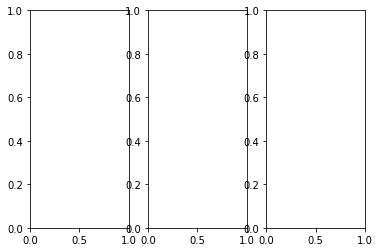

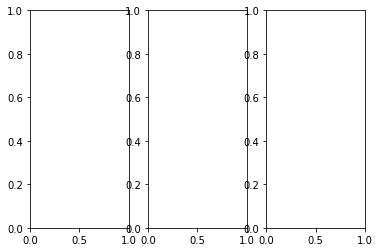

In [5]:
fig, axs = plt.subplots(1,len(cohens_results.keys()))
fig2, axs2 = plt.subplots(1,len(cohens_results.keys()))
available_colors = np.array(['c','blue','m','purple','green','lightgreen','crimson','red']).reshape(-1,2)
if not isinstance(axs,np.ndarray):
    axs=[axs]
if not isinstance(axs2,np.ndarray):
    axs2=[axs2]
for model_num, model_name in enumerate(cohens_results.keys()): 
    df_vals = pd.DataFrame(ece_results[model_name]).T
    plot_times_fill(df_vals,available_colors[model_num][0],axs[model_num],  'ece',model_name, ylabel ='ece')
    df_vals_cohens = pd.DataFrame(cohens_results[model_name]).T
    plot_times_fill(df_vals_cohens,available_colors[model_num][1],axs2[model_num],  'cohen kappa',model_name,ylabel= 'cohen kappa')
    axs[model_num].legend()
    axs2[model_num].legend()

In [7]:
ece_results[model_name].keys()

dict_keys([10, 22, 49, 108, 238, 524, 1158, 2556, 525, 2557, 130, 234, 422, 760, 1369, 2466, 4441, 8000, 15, 25, 41, 67, 111, 184, 303, 500, 50, 82, 135, 221, 362, 594, 975, 1600, 18, 32, 56, 100, 177, 315, 559, 560, 28, 52, 97, 182, 339, 632, 1178, 1179, 95, 181, 344, 654, 1243, 2364, 4496, 31, 99, 175, 311, 552, 19, 35, 65, 122, 229, 428, 800, 103, 213, 440, 909, 1876, 3875, 58, 105, 189, 341, 614, 190, 615, 23, 54, 126, 293, 680, 1582, 3680, 681, 1583, 3681, 136, 282, 588, 1225, 2552, 64, 119, 222, 412, 766, 413, 767, 20, 33, 55, 90, 150, 247, 409, 676, 677, 26, 68, 456, 1185, 3079])

In [4]:
dict_ece_cohen

{'cohen_kappa': {'GBDT': {10: [0.3261904295536012,
    0.06624762228826922,
    0.35253834596974254,
    0.37521999296022535,
    0.12637089966385942,
    0.8862052949372968,
    0.874439461883408,
    0.8027741655830083,
    0.7632968157301223,
    0.48591828036567997,
    0.11275964391691395,
    0.5229040622299048,
    0.3425659206736096,
    0.220012560184216,
    0.5550366911274183,
    -0.011627906976744207,
    0.026742537278121415,
    0.09817351598173507,
    0.11616161616161624,
    0.0032679738562092497,
    0.18185533306089086,
    0.10820648577101255,
    0.3124325224788204,
    0.1843346319458683,
    0.04615552881986218,
    0.18506887817065132,
    0.3076107695569218,
    0.2574697474546416,
    0.33507995302195326,
    0.4475718681978533,
    0.09920180614427195,
    0.1055658713051387,
    0.10531238698569383,
    -0.020285347217526617,
    0.1400730064526144,
    0.3203195006329461,
    -0.07968130786223093,
    0.21160572107824088,
    -0.05478221737817779,
    0.47